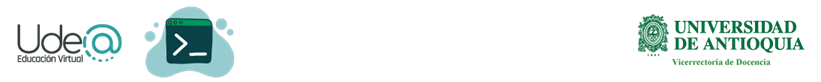


# Laboratorio #6 TDSIII
# Laboratorio Regresion lineal, Estimacion de parámetros
## Juan Camilo Chaparro Castellanos | Sebastian Escobar Osorio
## CC 1039466438 | CC 1017231742



In [1]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd
import scipy as sp
from scipy.fft import fft
import cv2
import os
from skimage.feature import hog, multiblock_lbp
from sklearn.model_selection import train_test_split

## 1. Dataseet
#### Este laboratorio tenemos como base el siguiente dataseet, que consta de los precios de propiedades en Colombia 
https://www.kaggle.com/datasets/julianusugaortiz/colombia-housing-properties-price/data

In [2]:
# Cargar el archivo CSV
archivo_csv = 'Housing.csv'
dataframe = pd.read_csv(archivo_csv)

In [3]:
dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Luego de la lectura del datasset antes de proceder a operar y analizar normalizamos los datos y estandarizarlos

In [4]:
#Funcion para normalizar
def normalize_min_max(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

#Funcion para estandarizar
def estandarizar(datos):
    media = np.mean(datos)
    sigma = np.std(datos)
    datos_estandarizados = (datos - media) / sigma
    return datos_estandarizados

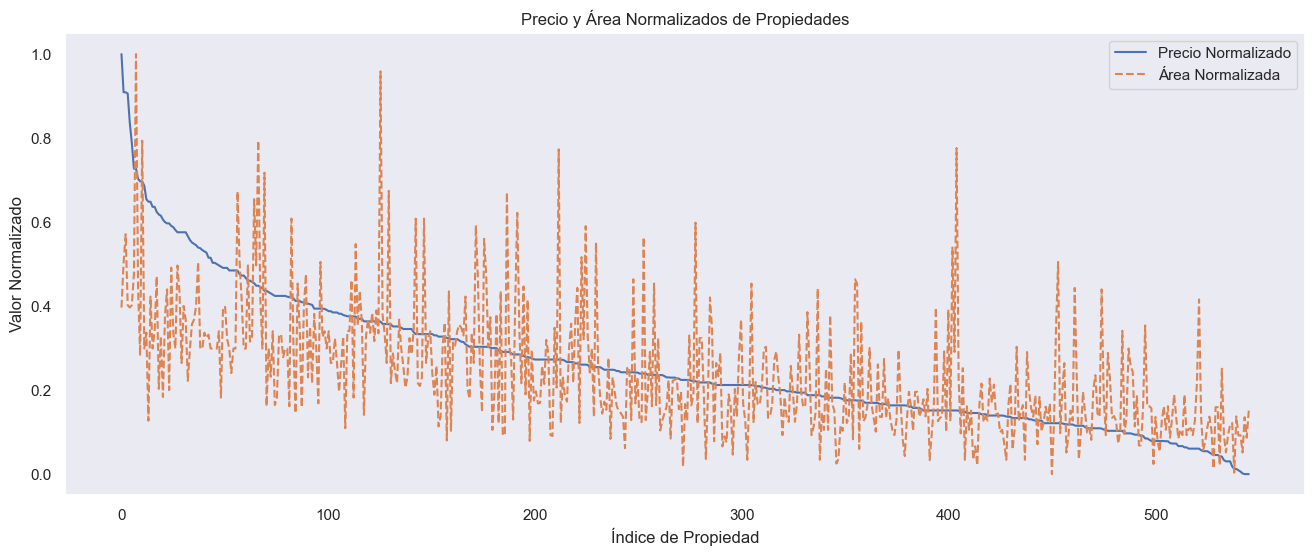

Total de datos de área: 545
Total de datos de precio: 545


In [5]:
# Selección de las columnas de interés (Área y Precio)
area = dataframe['area']
price = dataframe['price']

# Normalizar y estandarizar los datos de precio
area_normalized = normalize_min_max(area)
price_normalized = normalize_min_max(price)

# Generar un eje x en función del número de datos
N = len(area)
X = np.linspace(0, N, N)

# Gráfica de área normalizada vs precio normalizado
plt.figure(figsize=(16,6))
plt.plot(X, price_normalized, label="Precio Normalizado")
plt.plot(X, area_normalized, label="Área Normalizada", linestyle='--')
plt.xlabel('Índice de Propiedad')
plt.ylabel('Valor Normalizado')
plt.title('Precio y Área Normalizados de Propiedades')
plt.legend()
plt.grid()
plt.show()

# Imprimir tamaños de los datos
print(f"Total de datos de área: {len(area_normalized)}")
print(f"Total de datos de precio: {len(price_normalized)}")

## 2. Division de base de datos

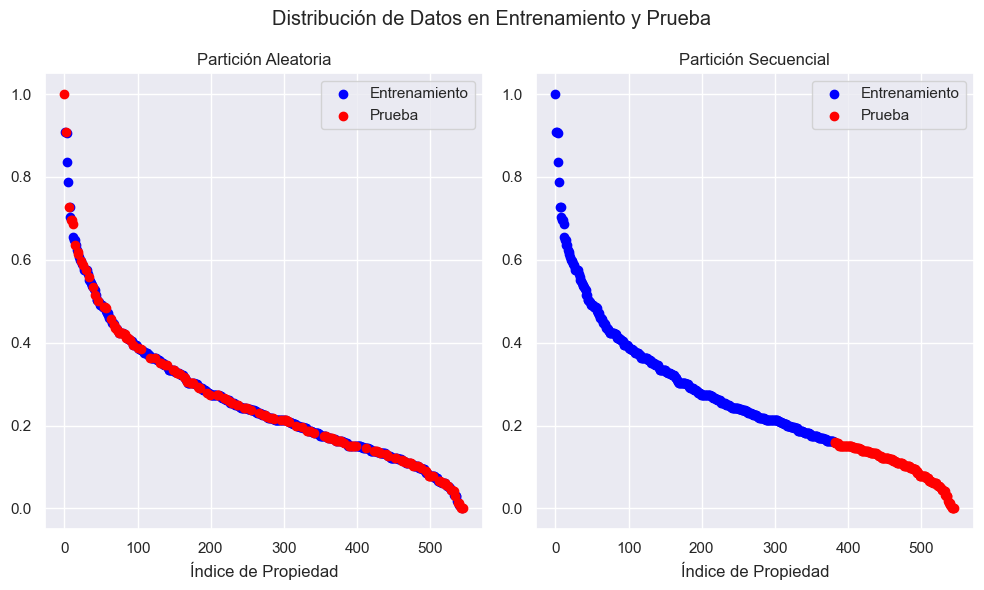

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba aleatoriamente
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, price_normalized, test_size=0.3, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba secuencialmente
n_train = int(0.7 * len(X))
X_train_seq = X[:n_train]
X_test_seq = X[n_train:]

y_train_seq = price_normalized[:n_train]
y_test_seq = price_normalized[n_train:]

# Visualizar la distribución de los datos en entrenamiento y prueba para la partición aleatoria
plt.figure(figsize=(10, 6))

# Partición aleatoria
plt.subplot(1, 2, 1)
plt.scatter(X_train_random, y_train_random, color='blue', label='Entrenamiento')
plt.scatter(X_test_random, y_test_random, color='red', label='Prueba')
plt.title('Partición Aleatoria')
plt.xlabel('Índice de Propiedad')

plt.legend()

# Visualizar la distribución de los datos en entrenamiento y prueba para la partición secuencial
plt.subplot(1, 2, 2)
plt.scatter(X_train_seq, y_train_seq, color='blue', label='Entrenamiento')
plt.scatter(X_test_seq, y_test_seq, color='red', label='Prueba')

plt.title('Partición Secuencial')
plt.xlabel('Índice de Propiedad')

plt.legend()

plt.suptitle('Distribución de Datos en Entrenamiento y Prueba')
plt.tight_layout()
plt.show()


 ## 3. Seleccione dos funciones base ya implementadas (polinomial, exponencial, o coseno), y además implemente un nuevo tipo de función base que usted eliga, de manera que pueda definir tres modelos diferentes de regresión lineal.

In [7]:
def poli_carac(X, K):
    # Extraer caracteristicas polinomiales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.zeros((N, K+1))

    # Calcular matriz Phi
    for k in range(K+1):
        Phi[:,k] = X**k
    return Phi

def plot_caracteristicas(X, Phi, K):
    legend = []
    for i in range(K+1):
        plt.plot(X, Phi[:, i])
        legend.append(r'$\phi_' + str(i) +'$(x)')
        plt.legend(legend);
        #plt.ylim([-1.5, 1.5])
        #plt.xlim([0, 1500])
        plt.grid(True)

def expo_carac(X, K):
    # Extraer caracteristicas exponenciales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,len(X),K)
    sig2 = 2000

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2)
    return Phi

def cos_carac(X, K):
    # Extraer caracteristicas sinusoidales
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 1/len(X)
    F = F0 * np.linspace(1, K, K)
    #print(1./F)

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X)
    return Phi

def gauss_carac(X, K):
    # Extraer características gaussianas
    # X: N x D, vector de entradas
    # K: escalar, número de funciones base gaussianas
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]
    
    # Inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(np.min(X), np.max(X), K)  # Centroides de las gaussianas
    sigma2 = (np.max(X) - np.min(X)) / K  # Varianza

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:, k] = np.exp(-((X - mu[k-1])**2) / (2 * sigma2))
    return Phi

In [56]:
K1 = 3
K2 = 5
K3 = 5
K4 = 5

Phi_cos = cos_carac(X, K1)
Phi_expo = expo_carac(X, K2)
Phi_poli = poli_carac(X,K3)
Phi_gauss = gauss_carac(X, K4)

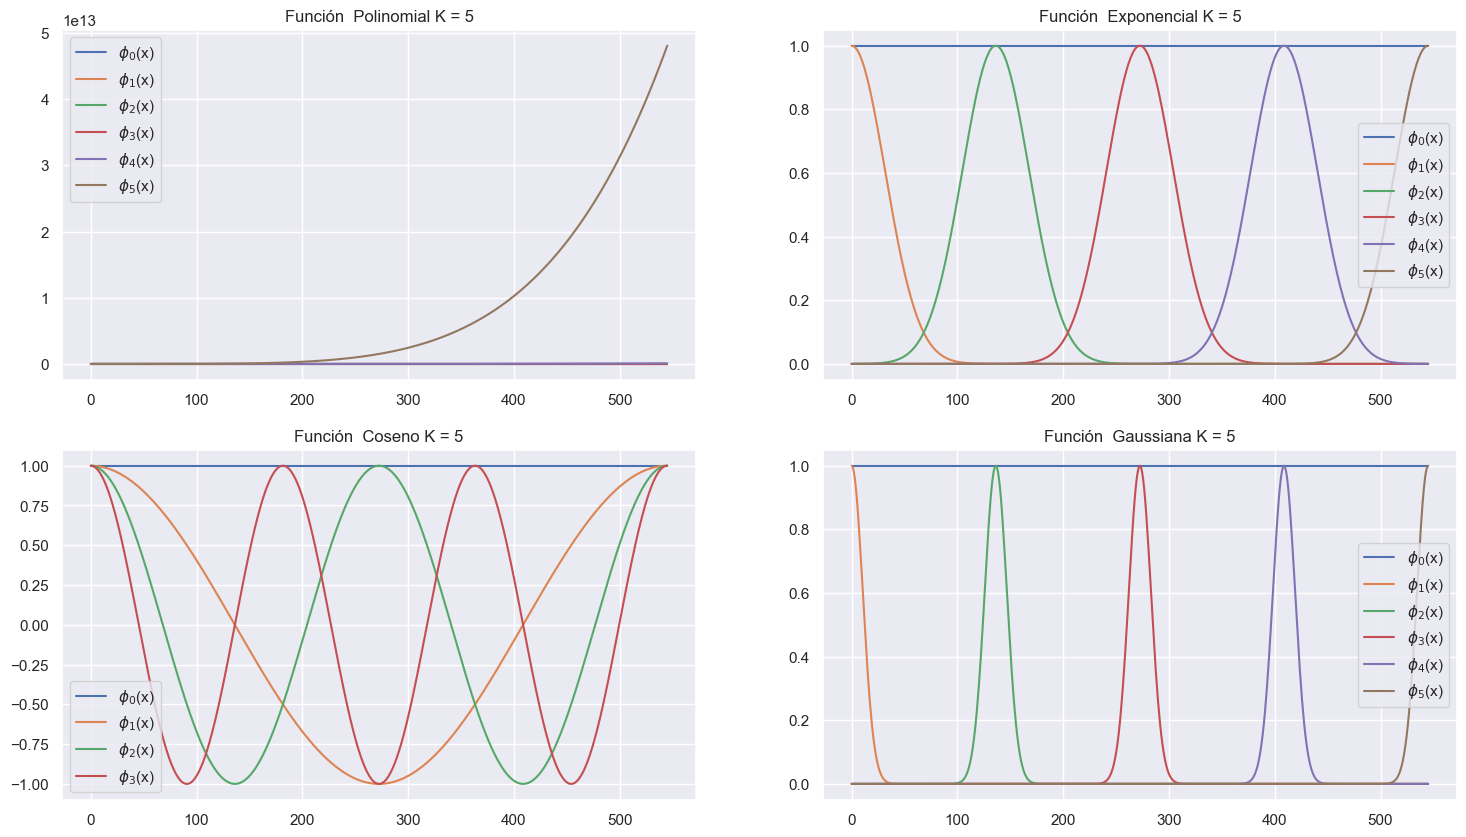

In [57]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plot_caracteristicas(X, Phi_poli, K4)
plt.title('Función  Polinomial K = ' + str(K4));
#plt.plot(X, y, '.k')

plt.subplot(2,2,2)
plot_caracteristicas(X, Phi_expo, K2)
plt.title('Función  Exponencial K = ' + str(K2));
#plt.xlim([0, 500])
#plt.plot(X, y, '.k')

plt.subplot(2,2,3)
plot_caracteristicas(X, Phi_cos, K1)
plt.title('Función  Coseno K = ' + str(K2));
#plt.xlim([0, 2500])
#plt.plot(X, Datos, '.k')


plt.subplot(2,2,4)
plot_caracteristicas(X, Phi_gauss, K3)
plt.title('Función  Gaussiana K = ' + str(K3));
#plt.xlim([0, 200])
#plt.plot(X, Datos, '.k')

plt.show()


In [72]:
#Funciones
def inferencia_max_vero_carac(Phi, y):
    # máxima verosimilitud usando caracteristicas
    # Phi: N x D, caracteristicas
    # y: N x 1, datos de salida observados
    # return: D x 1, vector de parametros estimados

    kappa = 1e-09 # jitter
    D = Phi.shape[1]

    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
    C = sp.linalg.cho_factor(PP)
    theta_ml = sp.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y
    return theta_ml
def plot_prediccion(X, prediccion):
    # Gráfica predicción

    plt.plot(X_train_random, y_train_random, '.k')
    plt.plot(X, price_normalized, lw=2)
    plt.plot(X, prediccion, '--', lw=2)
    plt.legend(['datos entrenamiento', 'función real', 'predicción'])

#Funcion para sacar todas las verosimilitudes
def max_vero(funcion,Xtrain,ytrain,tipo):
  plt.figure(figsize=(18,5))

  if funcion == poli_carac:
    K=[3,6,11]
  else:
    K=[10,50,200]

  for i in range(3):
    Phi_poli = funcion(Xtrain, K[i]) # características datos entrenamiento
    # inferencia usando max vero
    theta_ml_poli = inferencia_max_vero_carac(Phi_poli, ytrain)
    # predicción sobre todos los datos
    Phi_test_poli = funcion(X, K[i]) # características todos los datos
    y_pred_poli = Phi_test_poli @ theta_ml_poli # predicción


    plt.subplot(1,3,i+1)
    plot_prediccion(X, y_pred_poli)
    plt.title('Predicción ' + tipo + ' K = ' + str(K[i]))
    plt.grid()

## Aleatorio

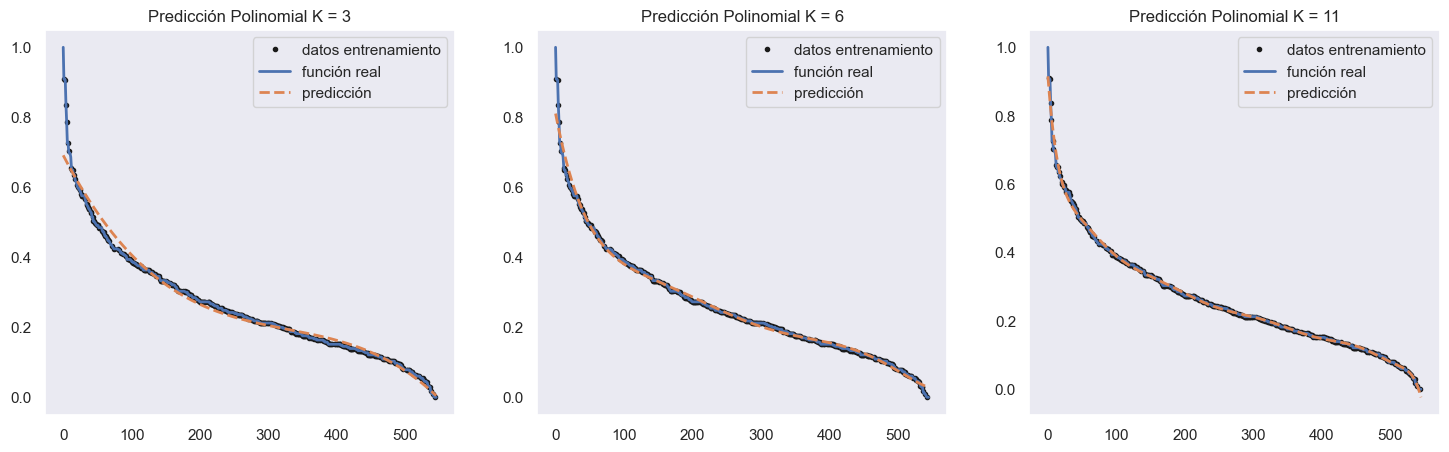

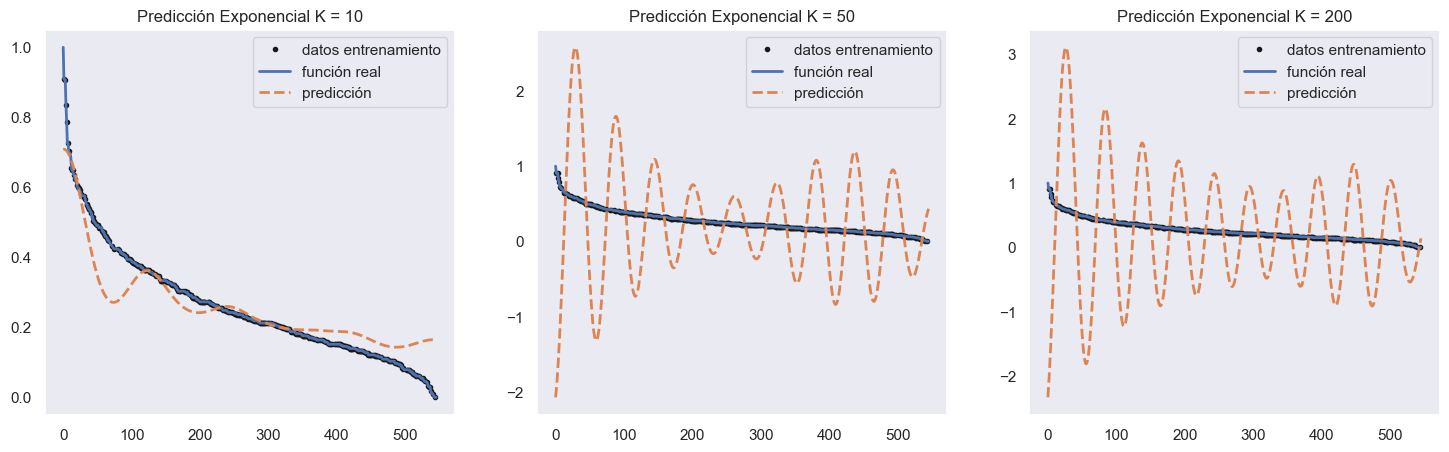

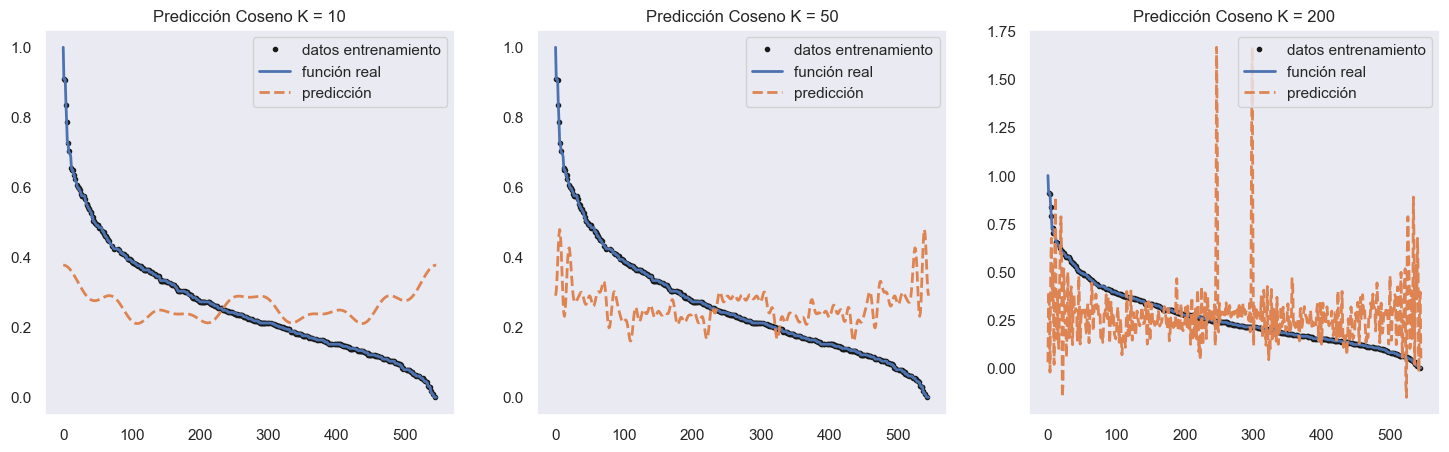

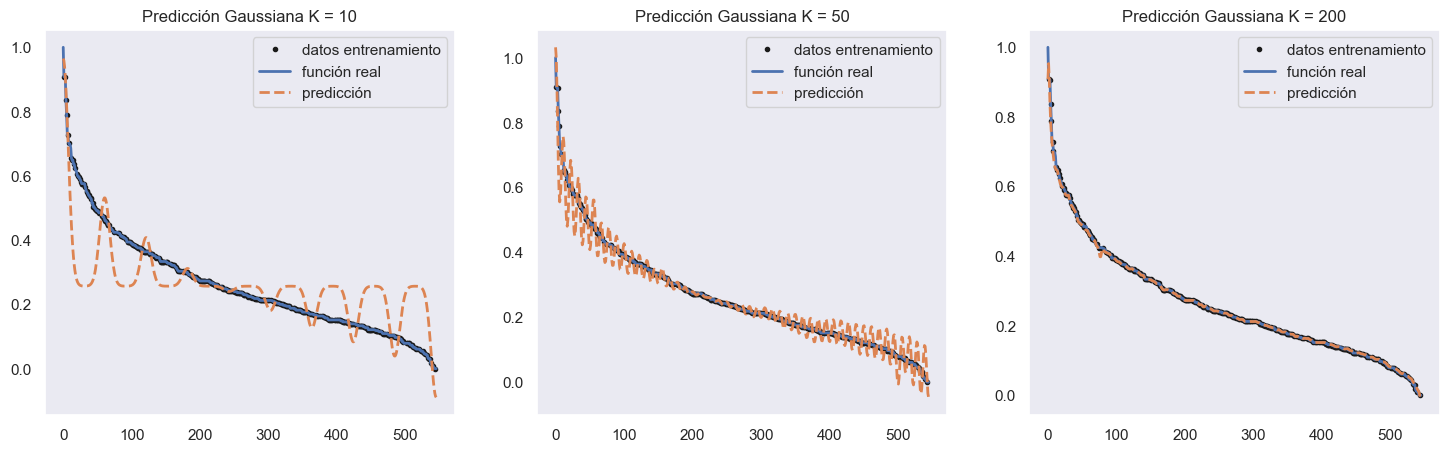

In [73]:
max_vero(poli_carac,X_train_random,y_train_random,'Polinomial')
max_vero(expo_carac,X_train_random,y_train_random,'Exponencial')
max_vero(cos_carac,X_train_random,y_train_random,'Coseno')
max_vero(gauss_carac,X_train_random,y_train_random,'Gaussiana')


## Secuencial

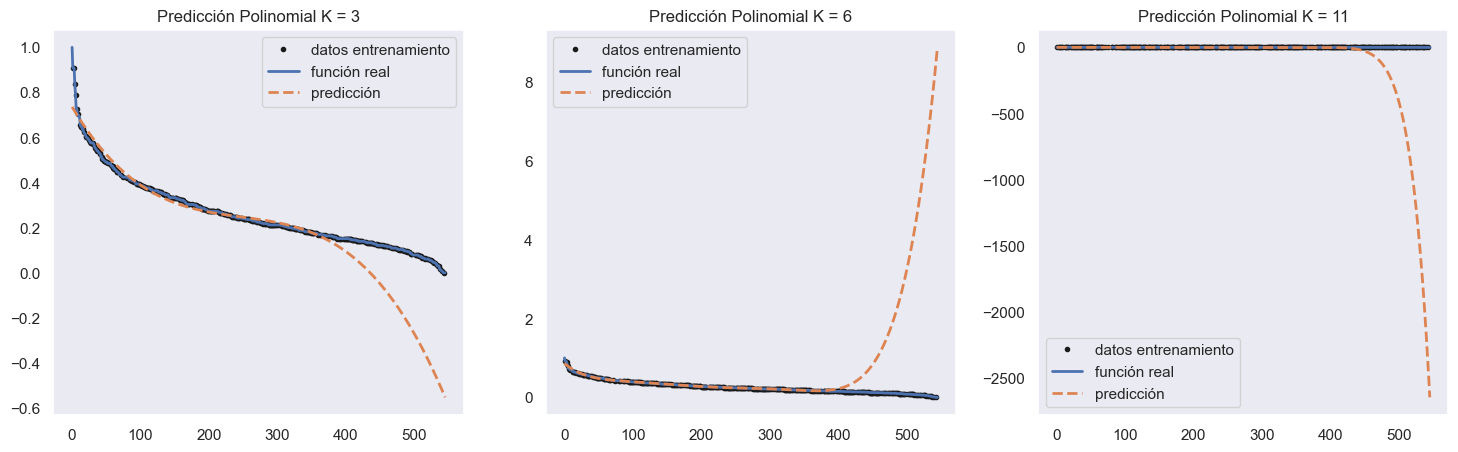

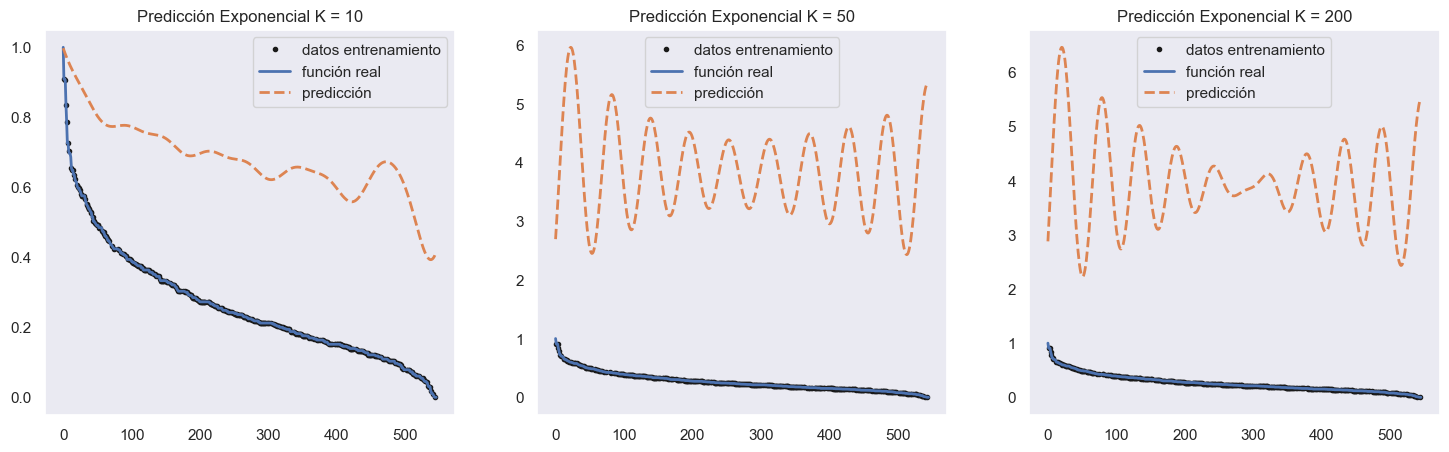

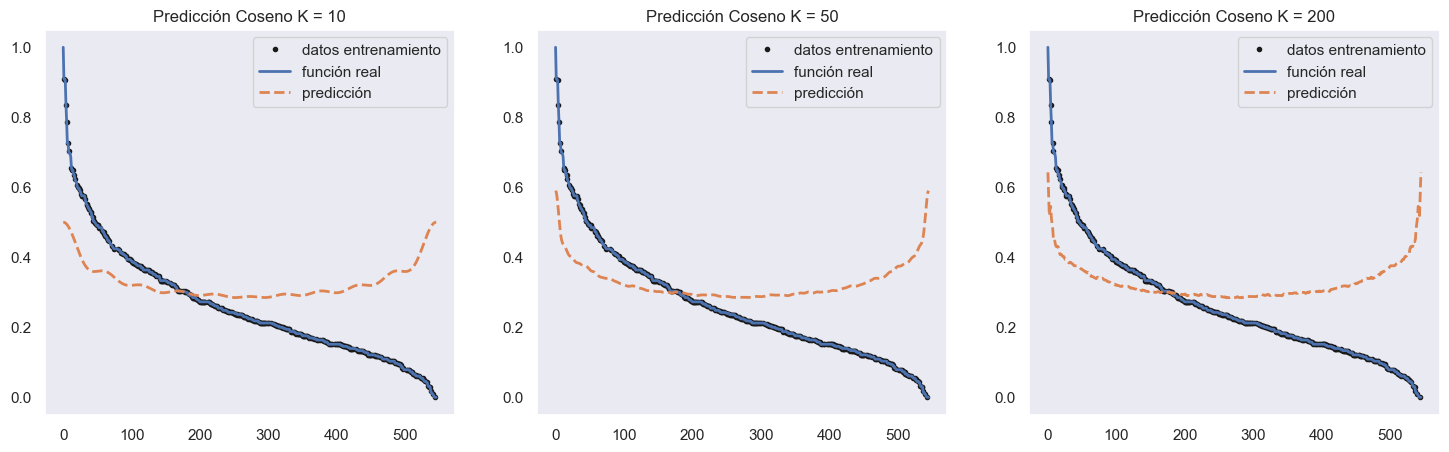

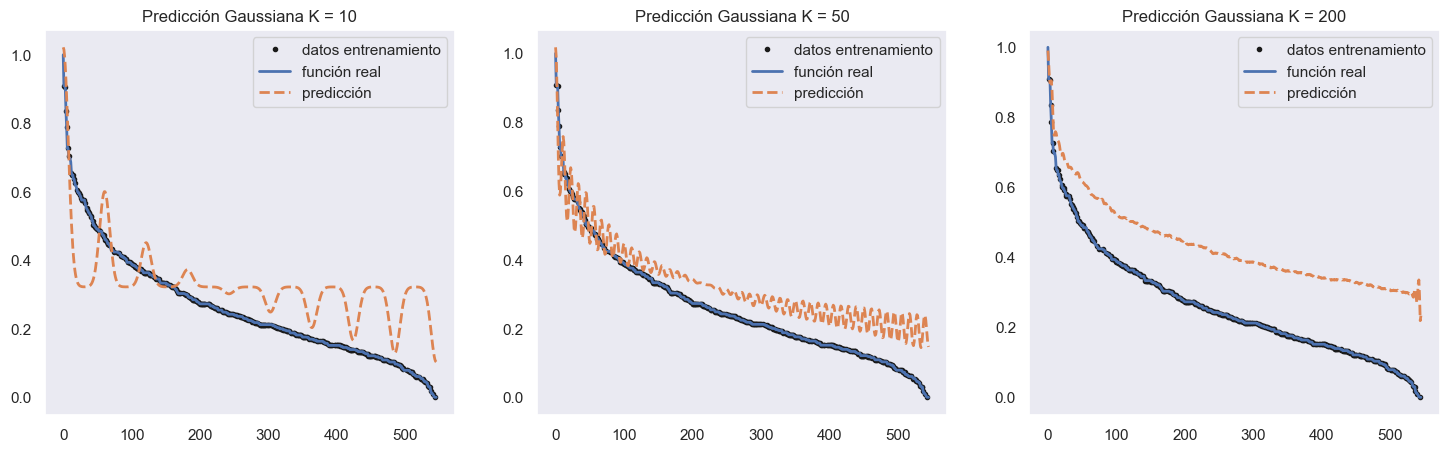

In [74]:
max_vero(poli_carac,X_train_seq,y_train_seq,'Polinomial')
max_vero(expo_carac,X_train_seq,y_train_seq,'Exponencial')
max_vero(cos_carac,X_train_seq,y_train_seq,'Coseno')
max_vero(gauss_carac,X_train_seq,y_train_seq,'Gaussiana')

### 7. Calcule el RMSE entre las predicciones de cada modelo y_pred y los datos de test y_test, así como el RMSE entre las predicciones de cada modelo y_pred y los datos de entrenamiento y_train. Grafique los errores (eje y) vs el número de funciones base (eje x). ¿Qué modelo presenta mejor capacidad de generalización? argumente.

In [28]:
def rmse(y, y_pred):
    # Calculo función de error
    y = y.values.flatten()
    y_pred = y_pred.flatten()
    N = y.shape[0]
    difer = (y - y_pred)**2
    return np.sqrt((1.0/N) * np.sum(difer))

def rmse_k(carac,K_max,titulo,Xtrain,ytrain,Xtest,ytest):

  rmse_train = []
  rmse_test = []
  K_vector = []
  #carac = expo_carac # seleccionar tipo de caracteristicas (trigo, expo, sigmo)

  if K_max <= 10:
    cons=1
  else:
    cons=10

  for i in range(1, K_max,cons):
    K = i

    Phi_train = carac(Xtrain, K)
    theta_ml = inferencia_max_vero_carac(Phi_train, ytrain)

    y_pred = Phi_train @ theta_ml # predicción
    rmse_train.append(rmse(ytrain, y_pred)) # medir error

    # predicción sobre datos de test
    Phi_test = carac(Xtest, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_test.append(rmse(ytest, y_pred)) # medir error

    K_vector.append(i)

  plt.figure(figsize=(15,4))
  plt.plot(K_vector, rmse_train, '-', label='Error train')
  plt.plot(K_vector, rmse_test, '-', label='Error test')
  plt.xticks(K_vector);
  plt.ylabel('RMSE')
  plt.xlabel('K')
  plt.title(titulo)
  plt.legend()

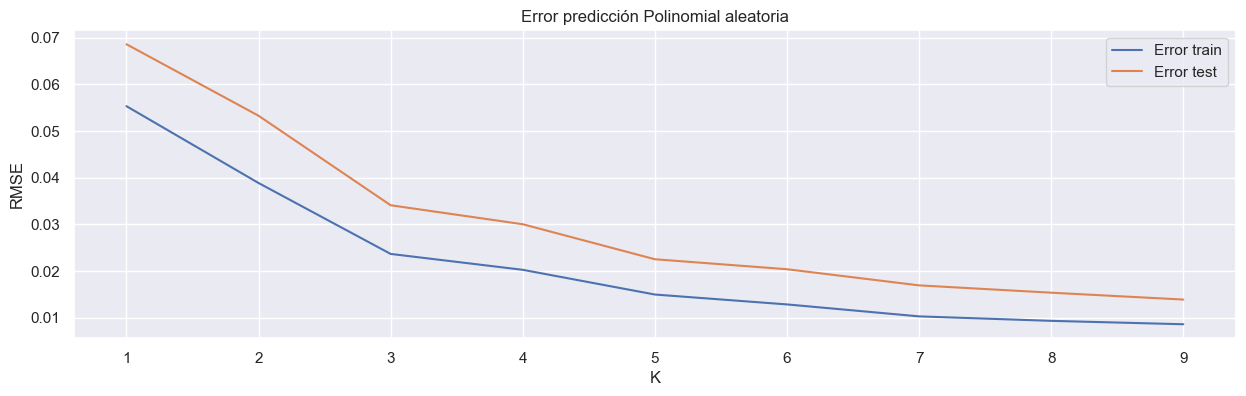

In [38]:
rmse_k(poli_carac,10,'Error predicción Polinomial aleatoria',X_train_random,y_train_random,X_test_random,y_test_random)

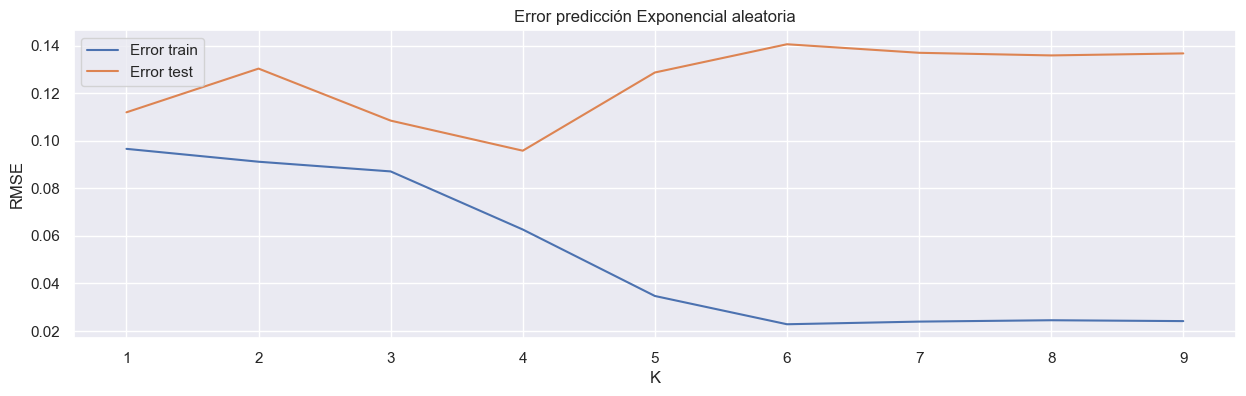

In [39]:
rmse_k(expo_carac,10,'Error predicción Exponencial aleatoria',X_train_random,y_train_random,X_test_random,y_test_random)

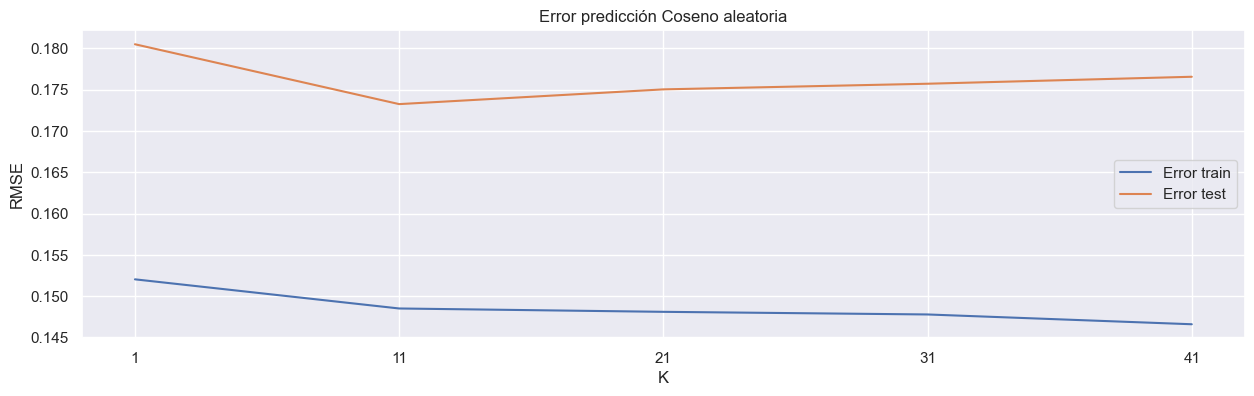

In [40]:
rmse_k(cos_carac,50,'Error predicción Coseno aleatoria',X_train_random,y_train_random,X_test_random,y_test_random)

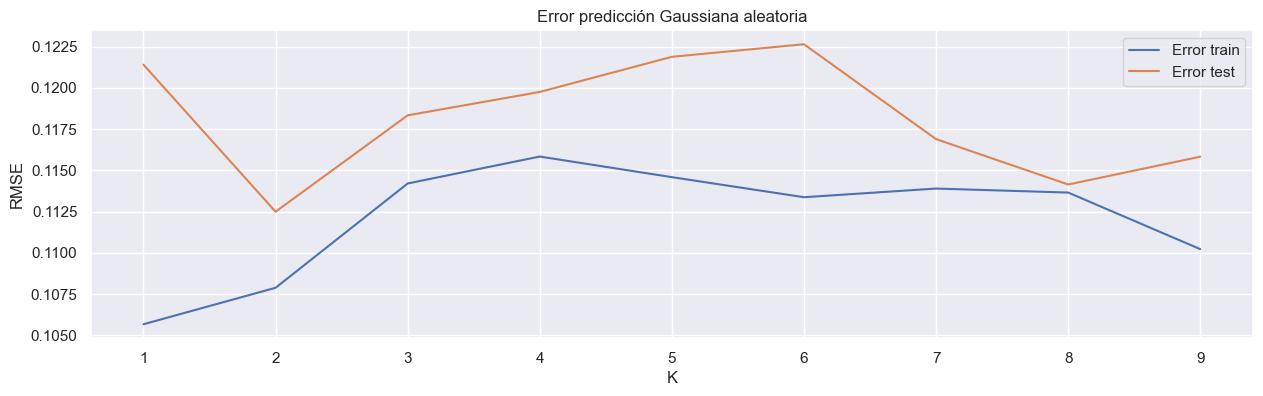

In [41]:
rmse_k(gauss_carac,10,'Error predicción Gaussiana aleatoria',X_train_random,y_train_random,X_test_random,y_test_random)

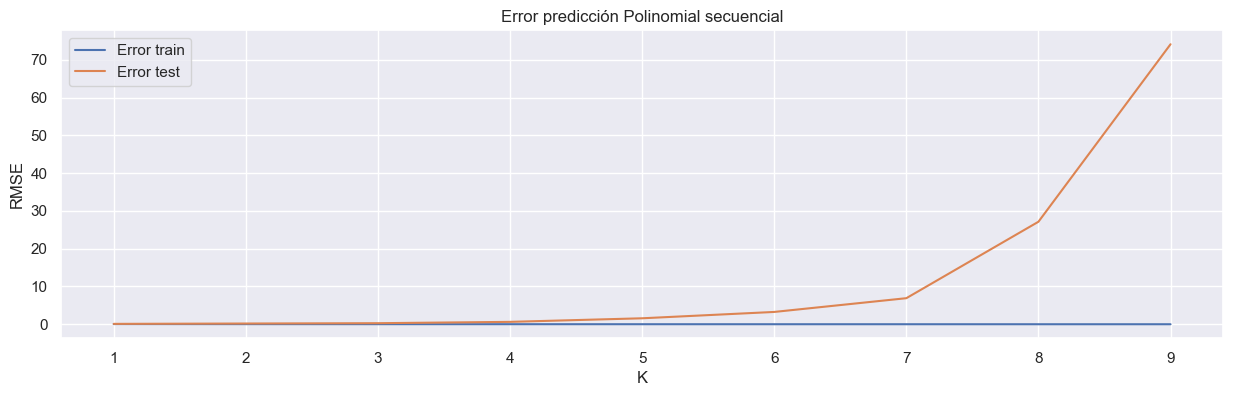

In [42]:
rmse_k(poli_carac,10,'Error predicción Polinomial secuencial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

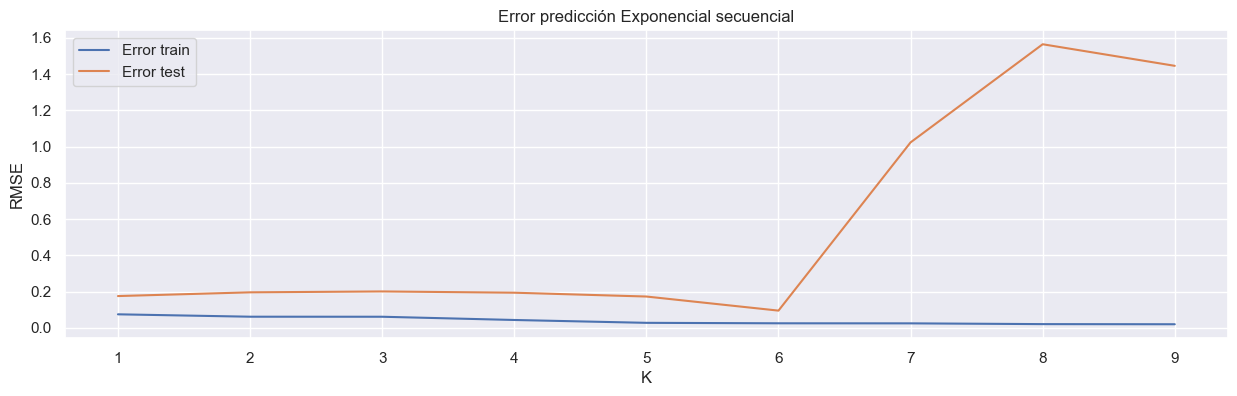

In [43]:
rmse_k(expo_carac,10,'Error predicción Exponencial secuencial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

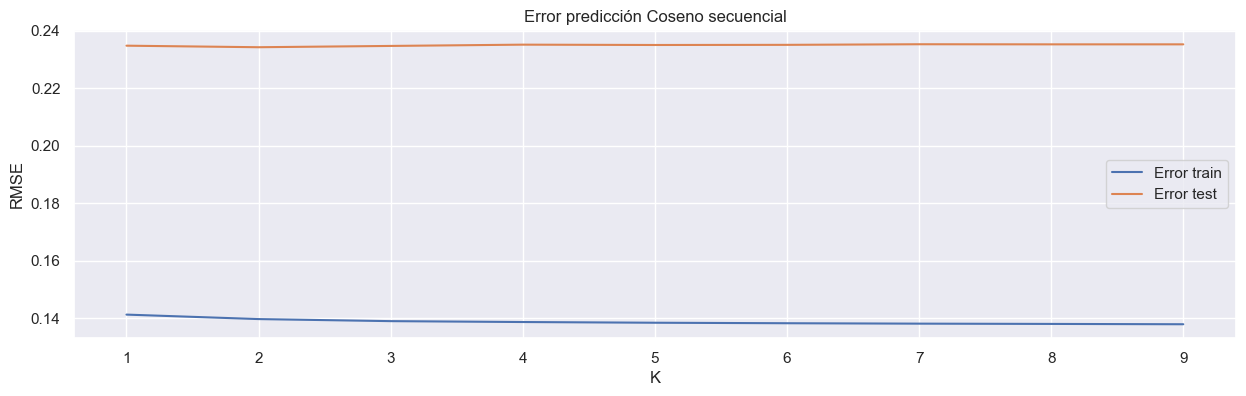

In [44]:
rmse_k(cos_carac,10,'Error predicción Coseno secuencial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)

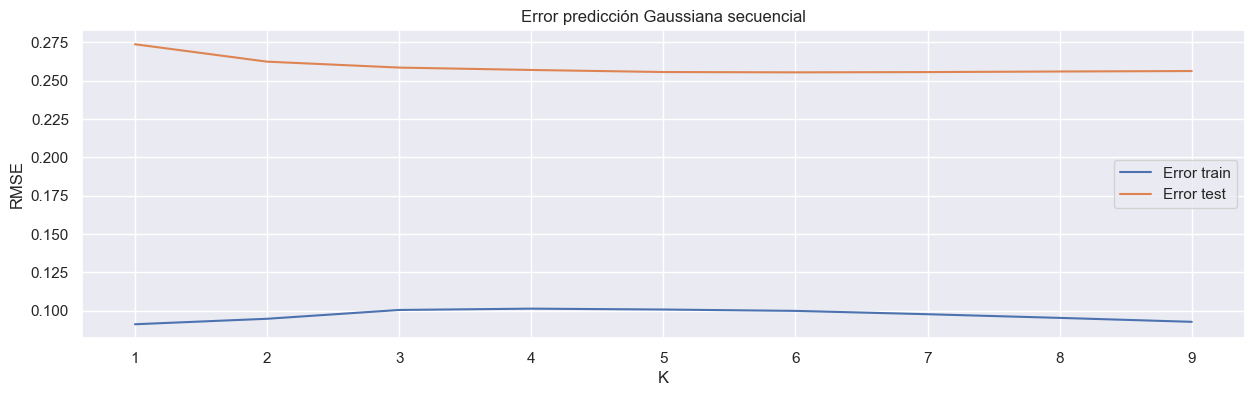

In [45]:
rmse_k(gauss_carac,10,'Error predicción Gaussiana secuencial',X_train_seq,y_train_seq,X_test_seq,y_test_seq)